# Sample Superstore Dataset EDA

In [1]:
# install packages
# python <=3.11
# !pip install ydata-profiling

In [2]:
import pandas as pd
from ydata_profiling import ProfileReport

In [3]:
df = pd.read_csv('SampleSuperstore.csv')
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
# df['City'] = df['City'].astype('category')

In [5]:
# create data profile report
profile = ProfileReport(df,title='Sample Superstore Data Profile')
# profile

In [6]:
# export data profile report as html
# profile.to_file('Sample Superstore Data Profile1.html')

In [7]:
# data cleaning
# check orig count
df['Segment'].count()

9994

In [8]:
# after deleting duplicates
df = df.drop_duplicates()
df.count()

Ship Mode       9977
Segment         9977
Country         9977
City            9977
State           9977
Postal Code     9977
Region          9977
Category        9977
Sub-Category    9977
Sales           9977
Quantity        9977
Discount        9977
Profit          9977
dtype: int64

In [9]:
# ProfileReport(df,title='Sample Superstore Data Profile').to_file('nodups.html')

In [10]:
# data prep and eda
# df.head()
# df.head(3)
# df.tail()
df.tail(2)


,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.60,4,0.0,13.320
9993,Second Class,Consumer,United States,Westminster,California,92683,West,Office Supplies,Appliances,243.16,2,0.0,72.948


In [11]:
# export df as csv
# df.to_csv('nodupes.csv',index=True)

In [12]:
# display df info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9977 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9977 non-null   object 
 1   Segment       9977 non-null   object 
 2   Country       9977 non-null   object 
 3   City          9977 non-null   object 
 4   State         9977 non-null   object 
 5   Postal Code   9977 non-null   int64  
 6   Region        9977 non-null   object 
 7   Category      9977 non-null   object 
 8   Sub-Category  9977 non-null   object 
 9   Sales         9977 non-null   float64
 10  Quantity      9977 non-null   int64  
 11  Discount      9977 non-null   float64
 12  Profit        9977 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1.1+ MB


In [13]:
# description
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9977.000000,9977.000000,9977.000000,9977.000000,9977.00000
mean,55154.964117,230.148902,3.790719,0.156278,28.69013
std,32058.266816,623.721409,2.226657,0.206455,234.45784
min,1040.000000,0.444000,1.000000,0.000000,-6599.97800
25%,23223.000000,17.300000,2.000000,0.000000,1.72620
50%,55901.000000,54.816000,3.000000,0.200000,8.67100
75%,90008.000000,209.970000,5.000000,0.200000,29.37200
max,99301.000000,22638.480000,14.000000,0.800000,8399.97600


In [14]:
df['Sales'].describe()

count     9977.000000
mean       230.148902
std        623.721409
min          0.444000
25%         17.300000
50%         54.816000
75%        209.970000
max      22638.480000
Name: Sales, dtype: float64

In [15]:
df[['Sales','Profit']].describe()

,Sales,Profit
count,9977.000000,9977.00000
mean,230.148902,28.69013
std,623.721409,234.45784
min,0.444000,-6599.97800
25%,17.300000,1.72620
50%,54.816000,8.67100
75%,209.970000,29.37200
max,22638.480000,8399.97600


In [16]:
# check nulls in a column
segmentnulls = df['Segment'].isnull().sum()
citynulls = df['City'].isnull().sum()
profitnulls = df['Profit'].isnull().sum()

f"Nulls in segment: {segmentnulls} | Nulls in city: {citynulls} | Nulls in profits: {profitnulls}"


'Nulls in segment: 0 | Nulls in city: 0 | Nulls in profits: 0'

In [17]:
# filtering
df[['Region','Sales','Profit']]

,Region,Sales,Profit
0,South,261.9600,41.9136
1,South,731.9400,219.5820
2,West,14.6200,6.8714
3,South,957.5775,-383.0310
4,South,22.3680,2.5164
...,...,...,...
9989,South,25.2480,4.1028
9990,West,91.9600,15.6332
9991,West,258.5760,19.3932
9992,West,29.6000,13.3200


In [18]:
dfSouthRegion = df[df['Region']=='South']
dfSouthRegion[['Region','Sales']]

,Region,Sales
0,South,261.9600
1,South,731.9400
3,South,957.5775
4,South,22.3680
12,South,15.5520
...,...,...
9971,South,140.7500
9980,South,85.9800
9987,South,79.9900
9988,South,206.1000


## some graphs

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

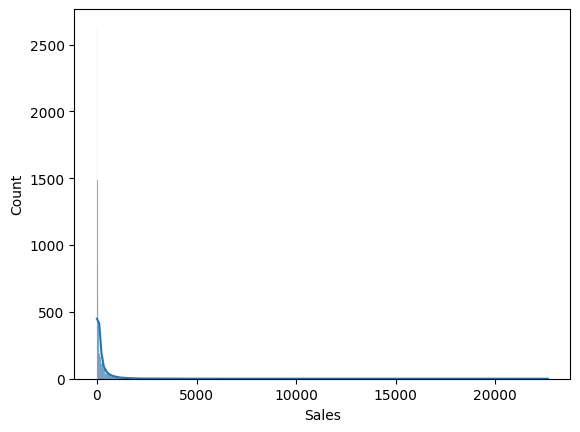

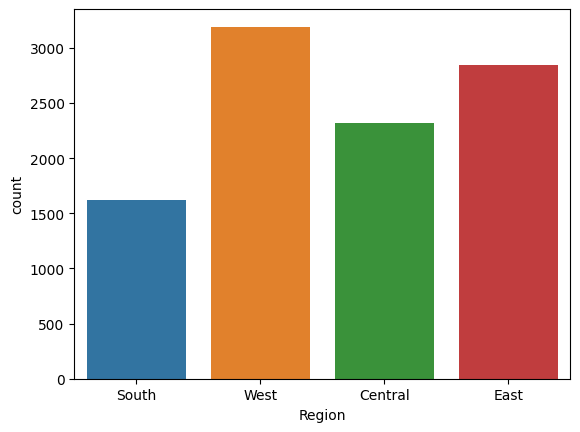

In [20]:
# univariate graph
# sales histogram
# Histogram for a numerical attribute
sns.histplot(df['Sales'], kde=True)
plt.show()

# Bar chart for a categorical attribute
sns.countplot(x='Region', data=df)
plt.show()



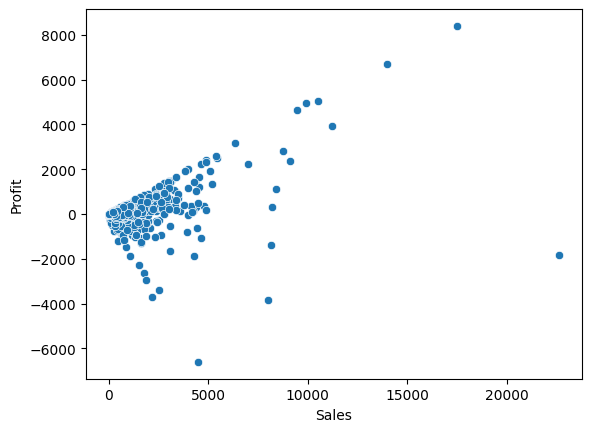

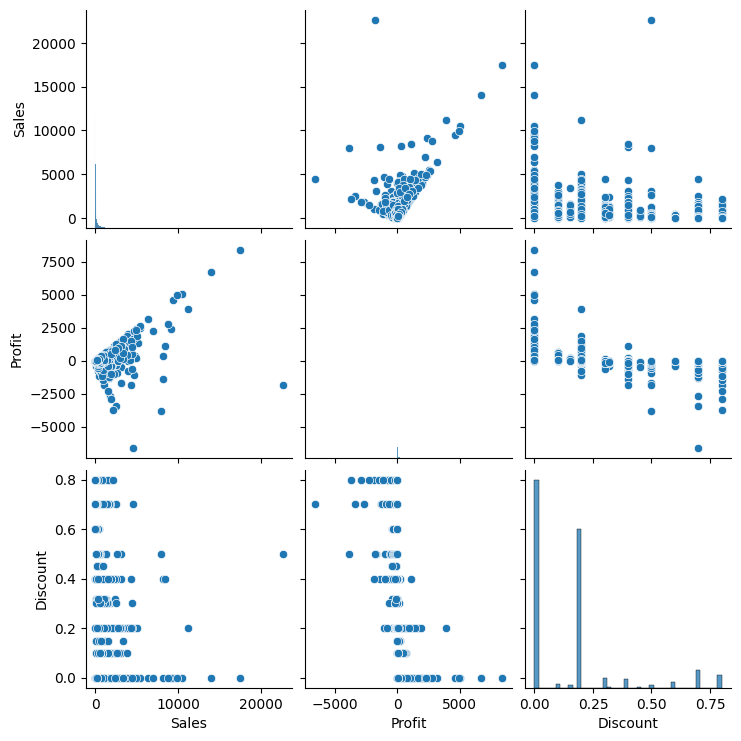

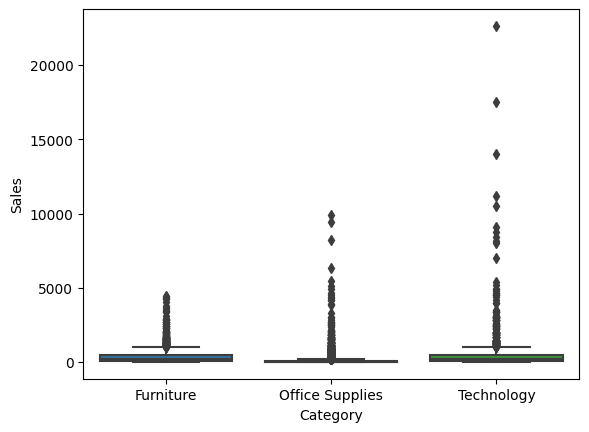

In [21]:
# Scatter plot for two numerical attributes
sns.scatterplot(x='Sales', y='Profit', data=df)
plt.show()

# Pairplot for multiple numerical attributes
sns.pairplot(df[['Sales', 'Profit', 'Discount']])
plt.show()

# Boxplot for a numerical and a categorical attribute
sns.boxplot(x='Category', y='Sales', data=df)
plt.show()

In [22]:
# Grouped analysis (e.g., average sales per region)
grouped_data = df.groupby('Region').mean()['Sales']
grouped_data

C:\Users\core360\AppData\Local\Temp\ipykernel_2576\2528732802.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_data = df.groupby('Region').mean()['Sales']


Region
Central    215.947759
East       238.465798
South      241.803645
West       227.139254
Name: Sales, dtype: float64

In [23]:
grouped_data = df.groupby('Region').sum()['Sales']
grouped_data

C:\Users\core360\AppData\Local\Temp\ipykernel_2576\708921911.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_data = df.groupby('Region').sum()['Sales']


Region
Central    500782.8528
East       678435.1960
South      391721.9050
West       725255.6365
Name: Sales, dtype: float64

In [24]:
grouped_data = df.groupby('Region').sum()['Sales'].round(2)
grouped_data

C:\Users\core360\AppData\Local\Temp\ipykernel_2576\1214627665.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_data = df.groupby('Region').sum()['Sales'].round(2)


Region
Central    500782.85
East       678435.20
South      391721.90
West       725255.64
Name: Sales, dtype: float64

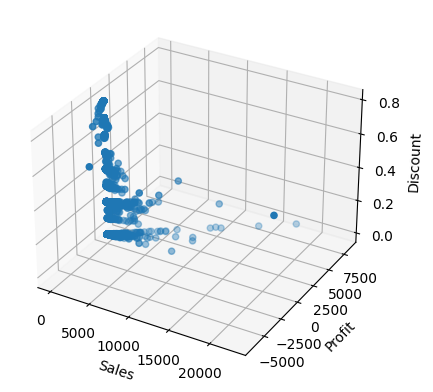

In [25]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = df['Sales']
y = df['Profit']
z = df['Discount']

ax.scatter(x, y, z)

ax.set_xlabel('Sales')
ax.set_ylabel('Profit')
ax.set_zlabel('Discount')

plt.show()


In [26]:
import ipywidgets as widgets

def basic_plot(plot_type):
    if plot_type == 'Histogram':
        df['Sales'].hist()
    elif plot_type == 'Boxplot':
        df.boxplot(column='Sales')
    plt.show()

widgets.interact(basic_plot, plot_type=['Histogram', 'Boxplot'])




interactive(children=(Dropdown(description='plot_type', options=('Histogram', 'Boxplot'), value='Histogram'), …

<function __main__.basic_plot(plot_type)>

In [27]:
def sales_by_region(region):
    regional_data = df[df['Region'] == region]
    sns.barplot(x='State', y='Sales', data=regional_data)
    plt.xticks(rotation=90)
    plt.show()

widgets.interact(sales_by_region, region=df['Region'].unique())


interactive(children=(Dropdown(description='region', options=('South', 'West', 'Central', 'East'), value='Sout…

<function __main__.sales_by_region(region)>

In [28]:
from IPython.display import display

def sales_by_region(region):
    regional_data = df[df['Region'] == region]
    ax = sns.barplot(x='State', y='Sales', data=regional_data)
    plt.xticks(rotation=90)
    
    # Adding data labels
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.2f'), 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha = 'center', va = 'center', 
                    xytext = (0, 10), 
                    textcoords = 'offset points')

    plt.show()

widgets.interact(sales_by_region, region=df['Region'].unique())

interactive(children=(Dropdown(description='region', options=('South', 'West', 'Central', 'East'), value='Sout…

<function __main__.sales_by_region(region)>

In [29]:
import plotly.express as px

def sales_by_region(region):
    regional_data = df[df['Region'] == region]
    fig = px.bar(regional_data, x='State', y='Sales', text='Sales')
    fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
    fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
    fig.show()

widgets.interact(sales_by_region, region=df['Region'].unique())


interactive(children=(Dropdown(description='region', options=('South', 'West', 'Central', 'East'), value='Sout…

<function __main__.sales_by_region(region)>

In [30]:
def sales_by_region_category(region, category):
    filtered_data = df[(df['Region'] == region) & (df['Category'] == category)]
    sns.barplot(x='Sub-Category', y='Sales', data=filtered_data)
    plt.xticks(rotation=90)
    plt.show()

region_widget = widgets.Dropdown(options=df['Region'].unique())
category_widget = widgets.Dropdown(options=df['Category'].unique())

widgets.interact(sales_by_region_category, region=region_widget, category=category_widget)


interactive(children=(Dropdown(description='region', options=('South', 'West', 'Central', 'East'), value='Sout…

<function __main__.sales_by_region_category(region, category)>

In [31]:

def sales_by_region_category(region, category):
    filtered_data = df[(df['Region'] == region) & (df['Category'] == category)]
    ax = sns.barplot(x='Sub-Category', y='Sales', data=filtered_data)
    plt.xticks(rotation=90)

    # Add annotations
    for p in ax.patches:
        ax.annotate(f"{p.get_height():.2f}", 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha = 'center', va = 'center', 
                    xytext = (0, 9), 
                    textcoords = 'offset points')

    plt.show()

region_widget = widgets.Dropdown(options=df['Region'].unique())
category_widget = widgets.Dropdown(options=df['Category'].unique())

widgets.interact(sales_by_region_category, region=region_widget, category=category_widget)


interactive(children=(Dropdown(description='region', options=('South', 'West', 'Central', 'East'), value='Sout…

<function __main__.sales_by_region_category(region, category)>

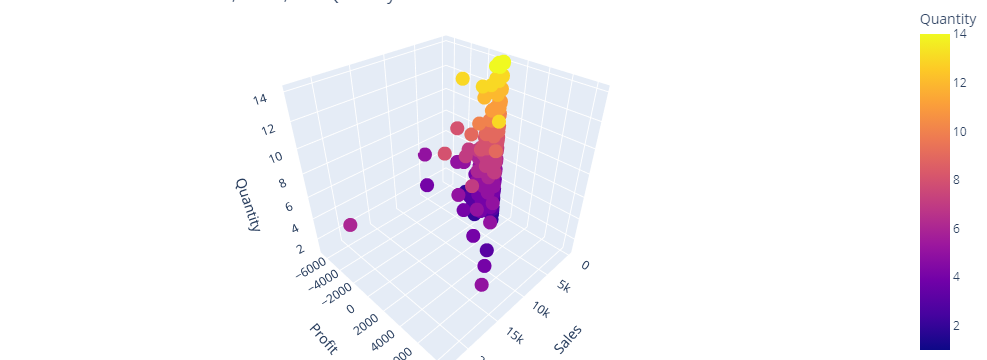

In [32]:
# 3D Scatter Plot with Plotly
scatter_plot = px.scatter_3d(df, x='Sales', y='Profit', z='Quantity', color='Quantity',
                             title='3D Scatter Plot of Sales, Profit, and Quantity')
scatter_plot.update_layout(margin=dict(l=0, r=0, b=0, t=0))
scatter_plot.show()


In [33]:
import numpy as np

np.random.seed(0)  # For reproducibility
start_date = pd.to_datetime('2015-01-01')
end_date = pd.to_datetime('2019-12-31')
date_range = pd.date_range(start_date, end_date)
df = pd.read_csv('SampleSuperstore.csv').copy()  # Creates a copy of the DataFrame
df['Order Dates'] = np.random.choice(date_range, size=len(df))


In [34]:
df['Order Dates'] = pd.to_datetime(df['Order Dates'])
df['Year'] = df['Order Dates'].dt.year
sales_by_year_subcategory = df.groupby(['Year', 'Sub-Category'])['Sales'].sum().reset_index()


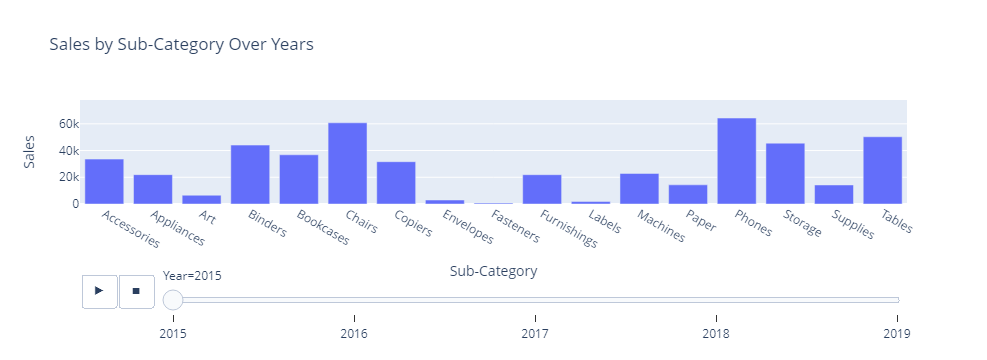

In [35]:
animated_bar_chart = px.bar(sales_by_year_subcategory, 
                            x='Sub-Category', 
                            y='Sales', 
                            animation_frame='Year', 
                            range_y=[0, sales_by_year_subcategory['Sales'].max()],
                            title='Sales by Sub-Category Over Years')
animated_bar_chart.show()


In [36]:
np.random.seed(0)
start_date = pd.to_datetime('2015-01-01')
end_date = pd.to_datetime('2019-12-31')
date_range = pd.date_range(start_date, end_date)
df['Order Dates'] = np.random.choice(date_range, size=len(df))
df['Year'] = df['Order Dates'].dt.year


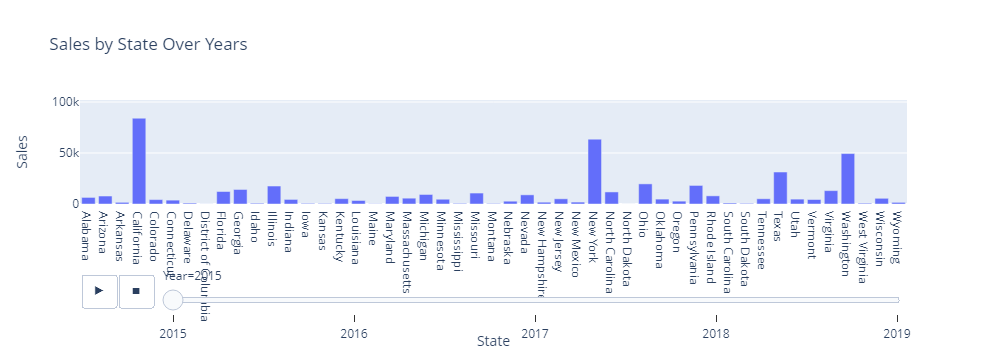

In [37]:
sales_by_year_state = df.groupby(['Year', 'State'])['Sales'].sum().reset_index()

animated_bar_chart = px.bar(sales_by_year_state, 
                            x='State', 
                            y='Sales', 
                            animation_frame='Year', 
                            range_y=[0, sales_by_year_state['Sales'].max()],
                            title='Sales by State Over Years')
animated_bar_chart.show()
